## Análise Exploratória de Dados

Análise exploratória de dados (AED) é uma etapa muito importante para a análise de dados estatísticos.
Ela é posta em prática antes de qualquer tipo de modelagem em si, para que o análista ou pesquisador seja capaz de conhecer e entender ao máximo os dados em mãos.

A finalidade da EAD é examinar os dados antes de qualquer tipo de modelagem em si, para que o analista ou pesquisador possa ter um entendimento básico de seus dados e das relações existentes entre as variáveis analisadas.

Obviamente, a primeira etapa consiste em obter os dados e disponibilizados em um formato adequado para análise.
Posteriormente, inicia-se uma análise descritiva detalhada, para que o pesquisador ou analista possa se familiarizar com os dados, organizá-los e sintetizá-los de forma a obter as informações necessárias ao estudo.

Na análise exploratória podemos:

- realizar um exame gráfico das variáveis individuais;
- realizar um exame gráfico de relações entre as variáveis e uma análise descritiva sobre o grau de correlação entre elas;
- avaliar a presença de dados ausentes (missing);
- identificar os possíveis outliers;
- avaliar algumas suposições básicas, como normalidade, lineariedade e homocedasticidade.


#### A base de dados
Neste Notebook vamos analisar dados da Pesquisa Nacional por Amostra de Domicílios Contínua (PNADC).
A PNADC é uma pesquisa amostral levada à campo pelo 
Aqui analisazeremos os dados para o 4º trimestre de 2019.
Para saber mais sobre a PNADC acesse o site do IBGE:

https://www.ibge.gov.br/estatisticas/sociais/populacao/9171-pesquisa-nacional-por-amostra-de-domicilios-continua-mensal.html .


Para o exercício realizado neste Notebook empregaremos os dados da PNAD de forma bruta, sem adequar os dados ao desenho amostral da pesquisa. O objetivo é realizar o exercício sem introduzir temas relativos ao desenho amostral complexo (que exigiria a aplicação de conceitos estatísticos específicos).

O plano amostral adotado na PNAD Contínua é conglomerado em dois estágios de seleção com estratificação das unidades primárias de amostragem (UPAs). Mais detalhes podem ser vistos na notas metodológicas:

ftp://ftp.ibge.gov.br/Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_continua/Notas_metodologicas/notas_metodologicas.pdf .



## Análise Explortatória de dados no Python/ Pandas





Vamos começar importando as bibliotecas necessárias para a AED.
Abaixo segue uma lista das bibliotecas utilizadas e onde você pode encontar a documentação de cada uma delas.

- NumPy (https://numpy.org/)

- Pandas (https://pandas.pydata.org)

- Matplotlib para contruir gráficos (https://matplotlib.org)

- Seaborn para contruir gráficos (https://seaborn.pydata.org)

In [1]:
# importar bibliotecas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregar os dados

Aqui termos disponível os dados da PNADC (2019.4) em formato `.csv`. Originalmente, o IBGE fornece os dados no formato `.txt`.
Para facilitar o processo de leitura neste Notebook, fiz a conversão prévia dos dados.

Para carregar os dados usaremos a função `read_csv`.


In [2]:
# Importando diretamente em um diretório local (supondo que o notebook está no mesmo diretório)
# dfpnadc = pd.read_csv('pnad19t4.csv')

# Usando um arquivo compactado devemos usar e o parâmetro 'compression'
# dfpnadc = pd.read_csv('pnad19t4.zip', compression='zip')

# Importando o arquivo diretamente de um diretório no GitHub
dfpnadc = pd.read_csv('https://raw.githubusercontent.com/vitormiro/pnadc_python/master/pnad19t4.csv')

O Pandas carrega os dados na forma de um **DataFrame**.

Para termos uma ideia da dimensão do DataFrame vamos aplicar o método `shape`.

In [3]:
dfpnadc.shape

(542802, 21)

Com o método `info` temos informações como o nome das variáveis (colunas), a quantidade e o tipo de dados válidos (não faltantes).

In [4]:
dfpnadc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542802 entries, 0 to 542801
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Ano        542802 non-null  int64  
 1   Trimestre  542802 non-null  int64  
 2   UF         542802 non-null  int64  
 3   Capital    124388 non-null  float64
 4   UPA        542802 non-null  int64  
 5   Estrato    542802 non-null  int64  
 6   V1008      542802 non-null  int64  
 7   V1014      542802 non-null  int64  
 8   V1027      542802 non-null  float64
 9   V1029      542802 non-null  int64  
 10  posest     542802 non-null  int64  
 11  V2007      542802 non-null  int64  
 12  V2009      542802 non-null  int64  
 13  V2010      542802 non-null  int64  
 14  VD3004     508846 non-null  float64
 15  VD3005     508846 non-null  float64
 16  VD4001     439850 non-null  float64
 17  VD4002     258319 non-null  float64
 18  VD4009     231285 non-null  float64
 19  VD4010     231285 non-n

#### Dicionário da PNAD contínua

Para termos uma ideia das variáveis contidas nesta base de dados, podemos consultar o dicionário de dados da PNADC.
O dicionário pode ser encontrado na página da pesquisa.

Abaixo segue a descrição das principais variáveis que podem ser exploradas na nossa análise.


UF = unidade da federação

Capital = Município da Capital

V2007 = Sexo

V2009 = Idade do morador na data de referência

V2010 = Cor ou raça

VD3004 = Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental -  SISTEMA DE 9 ANOS

VD3005 = Anos de estudo (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental - SISTEMA DE 9 ANOS

VD4001 = Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade

VD4002 = Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade

VD4009 = Posição na ocupação e categoria do emprego do trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade

VD4010 = Grupamentos de atividade principal do empreendimento do trabalho principal da semana de referência para pessoas de 14 anos ou mais de idade
 
VD4020 = Rendimento mensal efetivo de todos os trabalhos para pessoas de 14 anos ou mais de idade (apenas para pessoas que receberam em dinheiro, produtos ou mercadorias em qualquer trabalho).


O método `head` permite vizualizar as primeiras linhas do DataFrame. Por *default* o Pandas apresenta as 5 primeira linhas. Aqui utilizaremos o argumento para mostrar as 20 primeiras linhas.

In [5]:
dfpnadc.head(20)

,Ano,Trimestre,UF,Capital,UPA,Estrato,V1008,V1014,V1027,V1029,...,V2007,V2009,V2010,VD3004,VD3005,VD4001,VD4002,VD4009,VD4010,VD4020
0,2019,4,11,11.0,110000016,1110011,1,7,98.756636,532471,...,2,45,4,5.0,12.0,1.0,1.0,1.0,9.0,2100.0
1,2019,4,11,11.0,110000016,1110011,1,7,98.756636,532471,...,2,27,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
2,2019,4,11,11.0,110000016,1110011,1,7,98.756636,532471,...,2,18,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
3,2019,4,11,11.0,110000016,1110011,1,7,98.756636,532471,...,1,6,4,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2019,4,11,11.0,110000016,1110011,3,7,98.756636,532471,...,1,55,4,2.0,1.0,2.0,NaN,NaN,NaN,NaN
5,2019,4,11,11.0,110000016,1110011,3,7,98.756636,532471,...,2,54,4,5.0,12.0,1.0,1.0,7.0,9.0,1000.0
6,2019,4,11,11.0,110000016,1110011,3,7,98.756636,532471,...,2,30,4,6.0,14.0,2.0,NaN,NaN,NaN,NaN
7,2019,4,11,11.0,110000016,1110011,3,7,98.756636,532471,...,1,16,4,2.0,8.0,2.0,NaN,NaN,NaN,NaN
8,2019,4,11,11.0,110000016,1110011,3,7,98.756636,532471,...,1,11,4,2.0,4.0,NaN,NaN,NaN,NaN,NaN
9,2019,4,11,11.0,110000016,1110011,4,7,98.756636,532471,...,1,24,1,5.0,12.0,1.0,1.0,9.0,6.0,2500.0


#### Removendo colunas

Alguma colunas deste DataFrame não serão importante para o exercício que iremos realizar.
Dessa forma, vamos excluí-las da base, deixando o DataFrame mais leve.
Para isso, usamos o médodo `drop` e passamos a lista de variáveis a serem deletadas.

In [6]:
dfpnadc = dfpnadc.drop(columns=['Ano', 'Trimestre', 'UPA', 'Estrato', 'V1008', 'V1014', 'V1027', 'V1029', 'posest'])
dfpnadc.head(20)

,UF,Capital,V2007,V2009,V2010,VD3004,VD3005,VD4001,VD4002,VD4009,VD4010,VD4020
0,11,11.0,2,45,4,5.0,12.0,1.0,1.0,1.0,9.0,2100.0
1,11,11.0,2,27,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
2,11,11.0,2,18,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
3,11,11.0,1,6,4,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,11,11.0,1,55,4,2.0,1.0,2.0,NaN,NaN,NaN,NaN
5,11,11.0,2,54,4,5.0,12.0,1.0,1.0,7.0,9.0,1000.0
6,11,11.0,2,30,4,6.0,14.0,2.0,NaN,NaN,NaN,NaN
7,11,11.0,1,16,4,2.0,8.0,2.0,NaN,NaN,NaN,NaN
8,11,11.0,1,11,4,2.0,4.0,NaN,NaN,NaN,NaN,NaN
9,11,11.0,1,24,1,5.0,12.0,1.0,1.0,9.0,6.0,2500.0


#### Renomear variáveis
Para não lidar com os códigos das variáveis durante toda a análise (e não precisar decorá-los) podemos renomear as colunas.
Para isso usamos o `rename`.

In [7]:
dfpnadc.rename(columns={'V2007':'sexo',
                   'V2009':'idade',
                   'V2010':'cor',
                   'VD3004':'escolaridade',
                   'VD3005':'anos_estudo',
                   'VD4001':'forca_trabalho',
                   'VD4002':'ocupado',
                   'VD4009':'tipo_ocupacao',
                   'VD4010':'atividade',
                   'VD4020':'renda_trabalho'}, inplace=True)
dfpnadc.head()

,UF,Capital,sexo,idade,cor,escolaridade,anos_estudo,forca_trabalho,ocupado,tipo_ocupacao,atividade,renda_trabalho
0,11,11.0,2,45,4,5.0,12.0,1.0,1.0,1.0,9.0,2100.0
1,11,11.0,2,27,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
2,11,11.0,2,18,4,5.0,12.0,2.0,NaN,NaN,NaN,NaN
3,11,11.0,1,6,4,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,11,11.0,1,55,4,2.0,1.0,2.0,NaN,NaN,NaN,NaN


Podemos "mapear" uma variável qualitativa usando o método `map` e passar um dicionário como argumento.

Aqui faremos isso para a variável `sexo`. Nesta variável código 1 = "homem" e código 2 = "mulher".

In [8]:
dfpnadc['sexo'] = dfpnadc['sexo'].map({1:'homem', 2:'mulher'})

In [9]:
dfpnadc['cor'] = dfpnadc['cor'].map({1:'branca', 2:'preta', 3:'amarela', 4:'parda', 5:'indigena', 9:'ignorado'})

In [10]:
dfpnadc.head(10)

,UF,Capital,sexo,idade,cor,escolaridade,anos_estudo,forca_trabalho,ocupado,tipo_ocupacao,atividade,renda_trabalho
0,11,11.0,mulher,45,parda,5.0,12.0,1.0,1.0,1.0,9.0,2100.0
1,11,11.0,mulher,27,parda,5.0,12.0,2.0,NaN,NaN,NaN,NaN
2,11,11.0,mulher,18,parda,5.0,12.0,2.0,NaN,NaN,NaN,NaN
3,11,11.0,homem,6,parda,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,11,11.0,homem,55,parda,2.0,1.0,2.0,NaN,NaN,NaN,NaN
5,11,11.0,mulher,54,parda,5.0,12.0,1.0,1.0,7.0,9.0,1000.0
6,11,11.0,mulher,30,parda,6.0,14.0,2.0,NaN,NaN,NaN,NaN
7,11,11.0,homem,16,parda,2.0,8.0,2.0,NaN,NaN,NaN,NaN
8,11,11.0,homem,11,parda,2.0,4.0,NaN,NaN,NaN,NaN,NaN
9,11,11.0,homem,24,branca,5.0,12.0,1.0,1.0,9.0,6.0,2500.0


#### Verificando valores ausentes (missing values) nas variáveis

É possível verificar a presença de algumas entradas na base `NaN` (Not a Number). São valores ausentes (por diversas razões) na nossa base.

O método `isnull` retorna valores booleanos indicando dados ausentes (TRUE) ou não (FALSE).

In [11]:
dfpnadc.isnull()

,UF,Capital,sexo,idade,cor,escolaridade,anos_estudo,forca_trabalho,ocupado,tipo_ocupacao,atividade,renda_trabalho
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
542797,False,False,False,False,False,False,False,False,False,False,False,False
542798,False,False,False,False,False,False,False,False,True,True,True,True
542799,False,False,False,False,False,False,False,True,True,True,True,True
542800,False,False,False,False,False,False,False,False,False,False,False,False


Podemos conciliar os métodos `isnull` e `sum` para termos a quantidade de valores faltantes em cada variável.
Algumas destas variaveis apresentam valores faltantes pelo fato da informação não ser aplicavél.
Em outros casos, o dado faltante representa a verdadeira ausência da informação, como o caso da renda do trabalho para uma pessoa que não está ocupada.

In [12]:
# Quantidade de valores faltantes
dfpnadc.isnull().sum()

UF                     0
Capital           418414
sexo                   0
idade                  0
cor                    0
escolaridade       33956
anos_estudo        33956
forca_trabalho    102952
ocupado           284483
tipo_ocupacao     311517
atividade         311517
renda_trabalho    319626
dtype: int64

Podemos também obter a proporção de valores faltantes em cada variável.

In [13]:
# Proporção de valores faltantes
(dfpnadc.isnull().sum() / dfpnadc.shape[0])*100

UF                 0.000000
Capital           77.084093
sexo               0.000000
idade              0.000000
cor                0.000000
escolaridade       6.255688
anos_estudo        6.255688
forca_trabalho    18.966769
ocupado           52.410087
tipo_ocupacao     57.390540
atividade         57.390540
renda_trabalho    58.884455
dtype: float64

Note que a variável capital possui mais de 77% de dados faltantes. Nesse caso, a razão é simples: são domicílios que compõem a amostra localizados fora do município da capital.
Por sua vez, variáveis de mercado de trabalho possuem muitos valores faltantes porque as questões da pesquisa nesta área não se aplicam a todos os entrevistados. A participação na força de trabalho, por exemplo, só se aplica para pessoa em idade para trabalhar (com exceção dos casos de trabalho infantil).
A renda do trabalho só será respondida por quem está ocupado e possui rendimentos. E ainda há a possibilidade de uma pessoa ocupada simplesmente omitir o valor dos seus rendimentos.

Podemos ter várias razões para dados ausentes, e isso deve ser analisado no contexto de cada base de dados.

**Observação**. Por padrão, o pandas exclui dados ausentes no cálculo de estatísticas descritivas.

### Análise descritiva dos dados

Um dos principais objetivos da AED é apresentar os dados de forma sistematizada.
Podemos aplicar técnicas de estatística descritiva para análisar os dados.

Vamos analisar inicialmente algumas variáveis categóricas como **sexo** e **raça**.

In [14]:
# Contando valores absolutos - frequência
dfpnadc['sexo'].value_counts()  #Alternativamente podemos usar o comando dfpnadc.sexo.value_counts()

mulher    278277
homem     264525
Name: sexo, dtype: int64

In [15]:
# Distribuição - frequência relativa
dfpnadc['sexo'].value_counts(normalize = True) * 100

mulher    51.26676
homem     48.73324
Name: sexo, dtype: float64

Vamos repetir estas operações atribuindo "rótulos" para os dados.

In [16]:
freq_sexo = dfpnadc['sexo'].value_counts()
dist_sexo = dfpnadc['sexo'].value_counts(normalize = True) * 100

Agora vamos contruir uma tabela (um "pequeno DataFrame") com as informações acima:

In [17]:
df_sexo = pd.DataFrame({'Frequência': freq_sexo, 'Percentual (%)': dist_sexo})
df_sexo

,Frequência,Percentual (%)
mulher,278277,51.26676
homem,264525,48.73324


Vamos aplicar esta mesma análise para a variável **cor**.

In [18]:
freq_cor = dfpnadc['cor'].value_counts()
dist_cor = dfpnadc['cor'].value_counts(normalize = True) * 100

df_cor = pd.DataFrame({'Frequência': freq_cor, 'Percentual (%)': dist_cor})
df_cor

,Frequência,Percentual (%)
parda,283365,52.204119
branca,206447,38.033574
preta,47596,8.768575
amarela,2689,0.495392
indigena,2620,0.482681
ignorado,85,0.015659


Vamos plotar um gráfico "pizza" para ver a distribuição da variável **cor**.

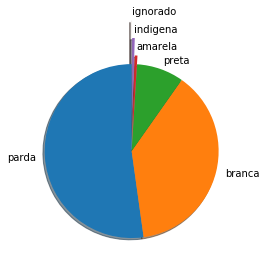

In [19]:
plt.pie(df_cor['Percentual (%)'], labels = df_cor.index,
        startangle = 90, 
        shadow = True, 
        explode = (0,0,0,0.1,0.3,0.5))
plt.show()

Considerando grupos com participações muito pequenas, talvez o gráfico "pizza" não seja a melhor forma de vizualizar estes dados!

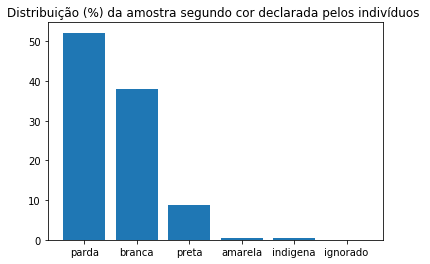

In [20]:
plt.bar(df_cor.index, df_cor['Percentual (%)'])
plt.title("Distribuição (%) da amostra segundo cor declarada pelos indivíduos ")
plt.show()

Vamos verificar também a distribuição da amostra entre os estados (UFs).

In [21]:
# contar valores
dfpnadc.UF.value_counts()

35    42568
31    39953
33    38547
21    36744
42    32873
41    28878
23    28481
43    28244
29    26634
26    22004
27    20817
32    20270
15    19886
52    18053
13    16278
25    14418
51    13155
22    12893
50    11825
24    11169
28    10442
12    10386
53     9849
11     9274
17     7788
14     6275
16     5098
Name: UF, dtype: int64

In [22]:
# Dicionário para os códigos das UFs
uf_map = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [23]:
dfpnadc['UF'] = dfpnadc['UF'].map(uf_map)

dist_uf = dfpnadc.UF.value_counts()
dist_uf

São Paulo              42568
Minas Gerais           39953
Rio de Janeiro         38547
Maranhão               36744
Santa Catarina         32873
Paraná                 28878
Ceará                  28481
Rio Grande do Sul      28244
Bahia                  26634
Pernambuco             22004
Alagoas                20817
Espírito Santo         20270
Pará                   19886
Goiás                  18053
Amazonas               16278
Paraíba                14418
Mato Grosso            13155
Piauí                  12893
Mato Grosso do Sul     11825
Rio Grande do Norte    11169
Sergipe                10442
Acre                   10386
Distrito Federal        9849
Rondônia                9274
Tocantins               7788
Roraima                 6275
Amapá                   5098
Name: UF, dtype: int64

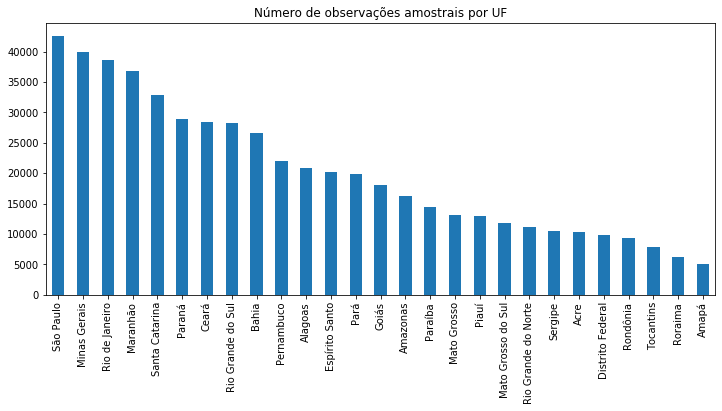

In [24]:
# Plotar em um gráfico de barras utilizando um formato um pouco diferente do comando
dist_uf.plot(kind='bar', figsize=(12,5))
plt.title("Número de observações amostrais por UF");

### Tabelas de Contingência (tabelas cruzadas)

Uma tabela de contingência apresenta as frequência (absolutas ou relativas) de múltiplas variáveis categóricas. As linhas e colunas das tabelas correspondem a essas variáveis categóricas.

Podemos usar o método `crosstab` para formatar tabelas de contingência na nossa análise.

In [25]:
# Frequências absolutas
sexo_cor = pd.crosstab(dfpnadc['sexo'], dfpnadc['cor'])
sexo_cor

cor,amarela,branca,ignorado,indigena,parda,preta
sexo,,,,,,
homem,1228,98471,43,1297,139759,23727
mulher,1461,107976,42,1323,143606,23869


In [26]:
# Frequências relativas - Distribuição conjunta
dist_sexo_cor = pd.crosstab(dfpnadc['sexo'], dfpnadc['cor'], normalize = True) * 100
dist_sexo_cor

cor,amarela,branca,ignorado,indigena,parda,preta
sexo,,,,,,
homem,0.226234,18.141238,0.007922,0.238945,25.747694,4.371207
mulher,0.269159,19.892336,0.007738,0.243735,26.456424,4.397368


#### Sumário estatístico

Com o método `describe` temos um sumário estatísticos para uma variável numérica.

Aqui vamos pedir um sumário estatístico para a variável **idade**.

In [27]:
dfpnadc['idade'].describe()

count    542802.000000
mean         35.642067
std          21.800881
min           0.000000
25%          17.000000
50%          34.000000
75%          52.000000
max         110.000000
Name: idade, dtype: float64

Podemos realizar o cálculo de medidas de tendência central - média, mediana e moda - usando os métodos `mean()`, `median()` e `mode()`.

In [28]:
tend_central_idade = {'Média (idade)': dfpnadc['idade'].mean(), 
                           'Mediana (idade)': dfpnadc['idade'].median(), 
                           'Moda (idade)': dfpnadc['idade'].mode()}
tend_central_idade

{'Média (idade)': 35.64206653623236,
 'Mediana (idade)': 34.0,
 'Moda (idade)': 0    19
 dtype: int64}

Vamos plotar um histograma da distribuição de idades.
Para este histograma vamos usar as bibliotecas **matplotlib** e **seaborn**.

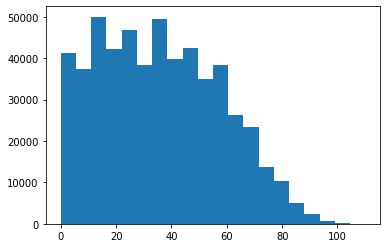

In [29]:
# Histograma com histtype = 'stepfilled' 
plt.hist(dfpnadc['idade'], bins=20, histtype = 'stepfilled', rwidth = 0.8)
plt.show()

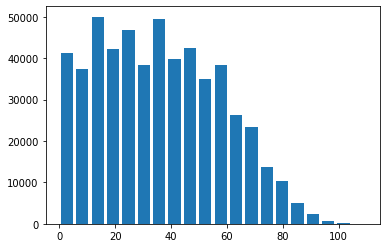

In [30]:
# Histograma com histtype = 'bar' 
plt.hist(dfpnadc['idade'], bins=20, histtype = 'bar', rwidth = 0.8)
plt.show()

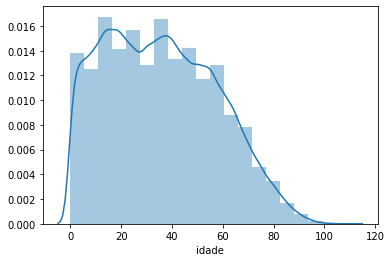

In [31]:
sns.distplot(dfpnadc['idade'], bins=20, kde = True);

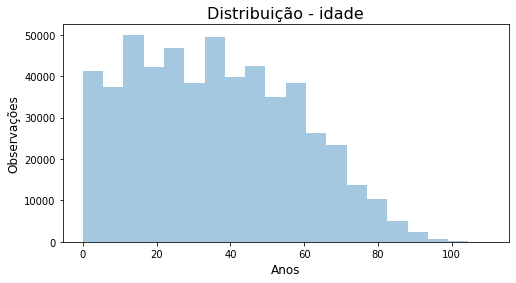

In [32]:
# Histograma com seaborn
hist_age = sns.distplot(dfpnadc['idade'], bins=20, kde =False)
hist_age.figure.set_size_inches(8, 4)
hist_age.set_title('Distribuição - idade', fontsize = 16)
hist_age.set_xlabel('Anos', fontsize = 12)
hist_age.set_ylabel('Observações', fontsize = 12);

### Cópias e subconjuntos

#### Cópia
Podemos criar uma cópia do DataFrame antes de aplicar algumas operações sobre ele. Dessa forma, podemos nos resguardar de ter uma cópia da versão trabalhada até o momento. Para isso usamos o método `copy`.

In [33]:
dfpnadc2 = dfpnadc.copy()

In [34]:
dfpnadc2.head()

,UF,Capital,sexo,idade,cor,escolaridade,anos_estudo,forca_trabalho,ocupado,tipo_ocupacao,atividade,renda_trabalho
0,Rondônia,11.0,mulher,45,parda,5.0,12.0,1.0,1.0,1.0,9.0,2100.0
1,Rondônia,11.0,mulher,27,parda,5.0,12.0,2.0,NaN,NaN,NaN,NaN
2,Rondônia,11.0,mulher,18,parda,5.0,12.0,2.0,NaN,NaN,NaN,NaN
3,Rondônia,11.0,homem,6,parda,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Rondônia,11.0,homem,55,parda,2.0,1.0,2.0,NaN,NaN,NaN,NaN


Poderíamos usar o novo DataFrame para selecionar subconjuntos de variáveis, fazer alterações em valores de colunas, entre outras operações. Alternativamente, podemos selecionar subconjuntos do DataFrame de referência e atribuir um novo DataFrame, mantendo o DataFrame anterior. É o que vamos fazer aqui.

In [35]:
# Como não vamos usar o dfpnadc2, vamos deletá-lo
del dfpnadc2

#### Subconjuntos condicionados

Para analisar apenas escolaridade de indivíduos adultos, com 25 anos ou mais de idade (idade razoável para completar as principais etapas de ensino) poderíamos adicionar condições aos comandos.
Aqui vamos optar por criar um novo DataFrame denominado **dfpnadc25**.

In [36]:
dfpnadc25 = dfpnadc[dfpnadc["idade"] >= 25]
dfpnadc25.head()

,UF,Capital,sexo,idade,cor,escolaridade,anos_estudo,forca_trabalho,ocupado,tipo_ocupacao,atividade,renda_trabalho
0,Rondônia,11.0,mulher,45,parda,5.0,12.0,1.0,1.0,1.0,9.0,2100.0
1,Rondônia,11.0,mulher,27,parda,5.0,12.0,2.0,NaN,NaN,NaN,NaN
4,Rondônia,11.0,homem,55,parda,2.0,1.0,2.0,NaN,NaN,NaN,NaN
5,Rondônia,11.0,mulher,54,parda,5.0,12.0,1.0,1.0,7.0,9.0,1000.0
6,Rondônia,11.0,mulher,30,parda,6.0,14.0,2.0,NaN,NaN,NaN,NaN


Vamos analizar a variável **anos de estudo** das pessoas com 25 anos ou mais de idade.

In [37]:
freq_estudo = dfpnadc25['anos_estudo'].value_counts()
freq_estudo

12.0    86960
16.0    48638
5.0     37416
0.0     28190
9.0     27058
6.0     20246
4.0     14666
3.0     12071
7.0     11532
8.0     10900
2.0      8874
1.0      8341
10.0     7458
11.0     7334
13.0     7066
14.0     5574
15.0     5439
Name: anos_estudo, dtype: int64

Note o ordenamento dos valores. Vamos usar aqui o `sort_index`

In [38]:
freq_estudo = dfpnadc25['anos_estudo'].value_counts().sort_index()
freq_estudo

0.0     28190
1.0      8341
2.0      8874
3.0     12071
4.0     14666
5.0     37416
6.0     20246
7.0     11532
8.0     10900
9.0     27058
10.0     7458
11.0     7334
12.0    86960
13.0     7066
14.0     5574
15.0     5439
16.0    48638
Name: anos_estudo, dtype: int64

In [39]:
dist_estudo = dfpnadc25['anos_estudo'].value_counts(normalize = True).sort_index() * 100
dist_estudo

0.0      8.106095
1.0      2.398473
2.0      2.551738
3.0      3.471042
4.0      4.217240
5.0     10.759051
6.0      5.821781
7.0      3.316051
8.0      3.134318
9.0      7.780586
10.0     2.144564
11.0     2.108908
12.0    25.005535
13.0     2.031844
14.0     1.602816
15.0     1.563996
16.0    13.985962
Name: anos_estudo, dtype: float64

Vamos usar o seaborn para plotar um histograma da variável 'anos de estudo'.

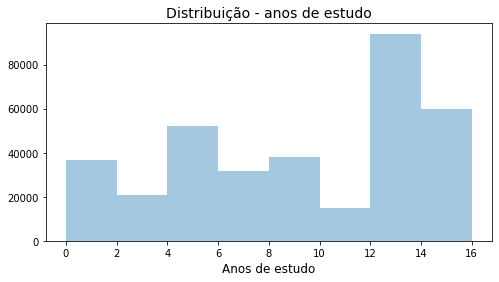

In [40]:
est = sns.distplot(dfpnadc25['anos_estudo'], bins=8, kde =False)
est.figure.set_size_inches(8, 4)
est.set_title('Distribuição - anos de estudo', fontsize = 14)
est.set_xlabel('Anos de estudo', fontsize = 12);

Vamos verificar a escolaridade média (anos de estudo) por sexo.

In [41]:
dfpnadc25.groupby('sexo').mean()[['anos_estudo']]

,anos_estudo
sexo,
homem,8.473286
mulher,9.143482


Usando boxplot para vizualizar esta informação.

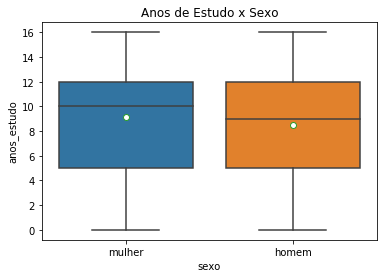

In [42]:
sns.boxplot(x = dfpnadc25['sexo'],
            y = dfpnadc25['anos_estudo'], 
            data = dfpnadc25,
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white"})
plt.title("Anos de Estudo x Sexo");

Vamos obter a escolaridade média (anos de estudo) por UF e plotar essa informação.

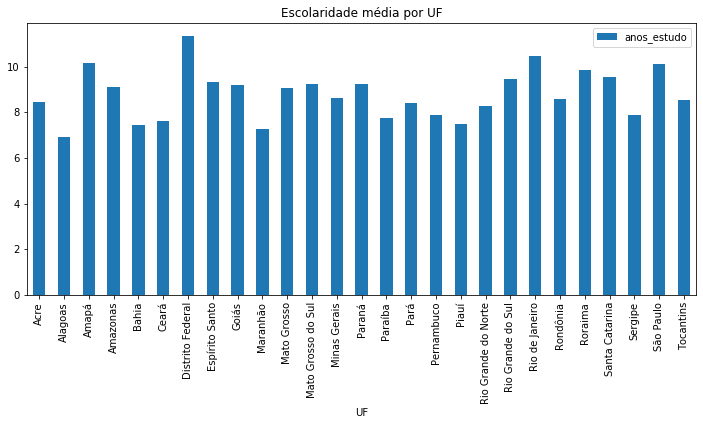

In [43]:
dfpnadc25.groupby('UF').mean()[['anos_estudo']].plot(kind='bar', figsize=(12,5))
plt.title("Escolaridade média por UF");

Vamos criar um DataFrame com esta informação da média de anos de estudo por UF.

Posteriomente vamos criar um gráfico de barras na horizontal e com as UFs ordenadas pela escolaridade média (em anos de estudo).

In [44]:
est_uf = dfpnadc25.groupby('UF').mean()[['anos_estudo']]
est_uf

,anos_estudo
UF,
Acre,8.443267
Alagoas,6.909084
Amapá,10.158484
Amazonas,9.086632
Bahia,7.446845
Ceará,7.616669
Distrito Federal,11.341625
Espírito Santo,9.336274
Goiás,9.185558


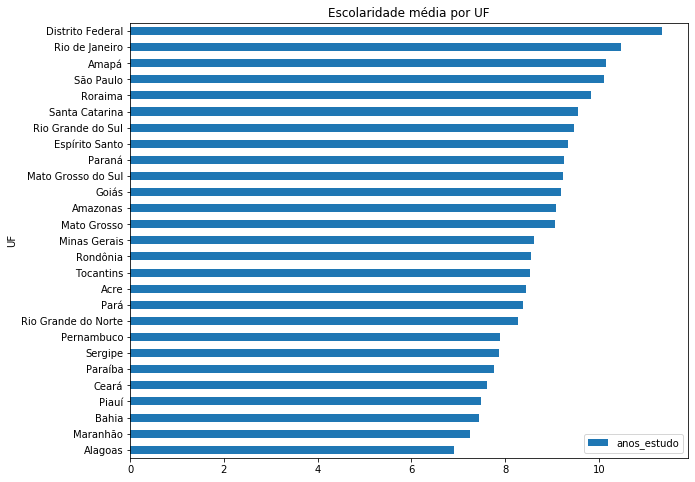

In [45]:
est_uf.sort_values('anos_estudo').plot(kind='barh', figsize=(10,8))
plt.title("Escolaridade média por UF")
plt.show()

#### Analisando rendimentos
Para análisar rendimentos do trabalho, vamos montar um DataFrame apenas com pessoas ocupadas no mercado de trabalho e com rendimentos positivos. Lembrando que nossa base já conta apenas com pessoas com idade igual ou superior a 25 anos.

In [46]:
pnadc_ocup = dfpnadc25[(dfpnadc25["ocupado"] == 1) & (dfpnadc25["renda_trabalho"] > 0)]

Agora vamos analisar a distribuição da variável de renda do trabalho.

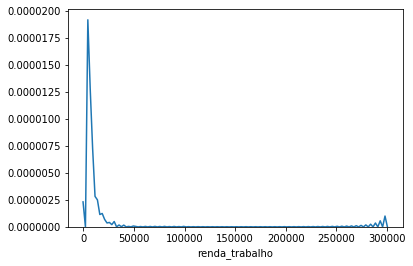

In [47]:
sns.distplot(pnadc_ocup["renda_trabalho"], hist = False, kde = True);

Podemos perceber pelo gráfico a presença de *outliers*.
Para verificar melhor, vamos plotar um boxplot.

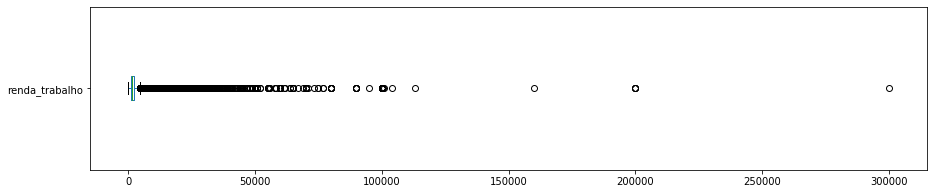

In [48]:
pnadc_ocup["renda_trabalho"].plot(kind='box', vert=False, figsize=(15, 3));

Verificar algumas estatísticas da distirbuição da renda do trabalho.

In [49]:
pnadc_ocup["renda_trabalho"].describe()

count    187669.000000
mean       2353.149034
std        3722.058127
min           5.000000
25%         998.000000
50%        1500.000000
75%        2500.000000
max      300000.000000
Name: renda_trabalho, dtype: float64

Temos uma média bem maior que a medida. Até mais próxima do 75º percentil.
Temos uma assimetria positiva bastante acentuada.
Vamos verificar o valor do coeficiente de assimetria.

In [50]:
print(pnadc_ocup["renda_trabalho"].skew())

13.204435363187008


Um procedimento que pode ser adotado é a exclusão de valores muito elevados da base.
Vamos analisar outras medidas de posição da nossa distribuição.

In [51]:
print("80º percentil = ",pnadc_ocup["renda_trabalho"].quantile(0.80))
print("90º percentil = ",pnadc_ocup["renda_trabalho"].quantile(0.90))
print("95º percentil = ",pnadc_ocup["renda_trabalho"].quantile(0.95))
print("99º percentil = ",pnadc_ocup["renda_trabalho"].quantile(0.99))

80º percentil =  3000.0
90º percentil =  5000.0
95º percentil =  7000.0
99º percentil =  17000.0


Antes de fazer alterações, vamos fazer uma cópia do DataFrame **pnadc_ocup** 

In [52]:
df_ocup = pnadc_ocup.copy()

Agora vamos usar a cópia e excluir observações com rendimentos acima do 95º percentil usando `drop`

In [53]:
df_ocup.drop(pnadc_ocup[pnadc_ocup["renda_trabalho"] >= 7000].index, axis = 0, inplace=True)

In [54]:
df_ocup["renda_trabalho"].describe()

count    177320.000000
mean       1725.717787
std        1287.905629
min           5.000000
25%         998.000000
50%        1400.000000
75%        2200.000000
max        6998.000000
Name: renda_trabalho, dtype: float64

In [55]:
print(df_ocup["renda_trabalho"].skew())

1.3956259508230302


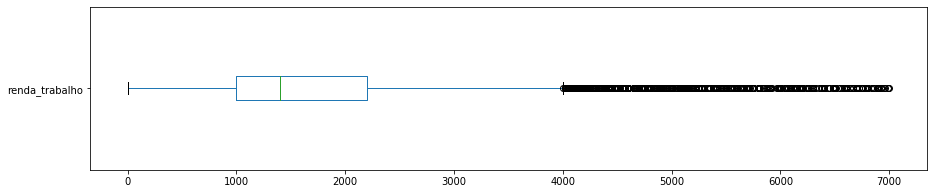

In [56]:
df_ocup["renda_trabalho"].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

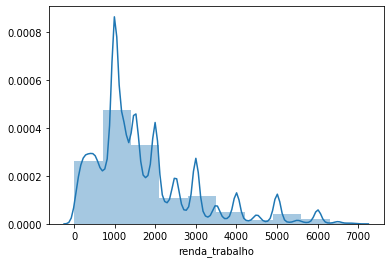

In [57]:
sns.distplot(df_ocup["renda_trabalho"], bins=10, kde = True);

In [58]:
# Renda do trabalho por UF
rtrab_uf = df_ocup.groupby('UF').mean()[["renda_trabalho"]]
rtrab_uf

,renda_trabalho
UF,
Acre,1661.673290
Alagoas,1275.563888
Amapá,1767.120968
Amazonas,1364.696514
Bahia,1207.632431
Ceará,1219.667056
Distrito Federal,2247.538601
Espírito Santo,1757.185726
Goiás,1859.655192


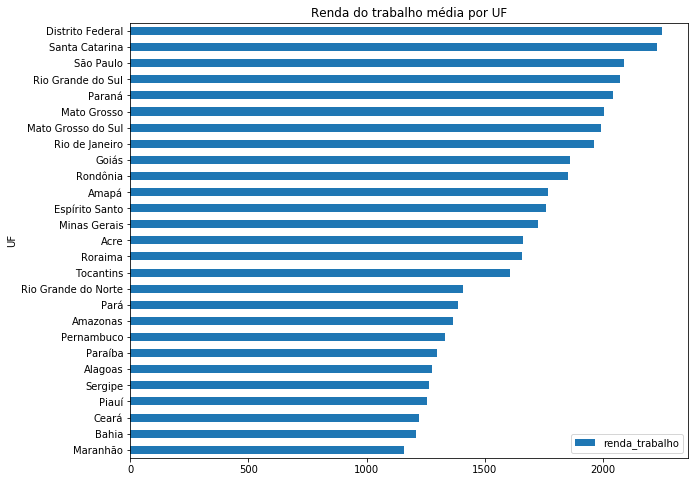

In [59]:
rtrab_uf.sort_values('renda_trabalho').plot(kind='barh', figsize=(10,8))
plt.title("Renda do trabalho média por UF");

Na modelagem estatística é muito comum a transformação logarítmica de variáveis. Adotar a escala logaritmica em um modelo de regressão possui algumas vantagens. Primeiro ela permite que relações não lineares possam ser tratadas no âmbito de um modelo linear. 

A transformação também é indicada em situações em que a distribuição dos resíduos é muito assimétrica e apresenta heterocedasticidade dos resíduos sejam garantidas. Nesse sentido, a transformação logaritmica torna a distribuição de resíduos mais simétrica (mais próxima da normal) e reduz o efeito de heterocedasticidade.

Aqui vamos aplicar a escala logaritmica (logaritmo natual) na renda trabalho, usando a função `log` do NumPy.

In [60]:
df_ocup["log_rtrab"] = np.log(df_ocup["renda_trabalho"])
df_ocup.head()

,UF,Capital,sexo,idade,cor,escolaridade,anos_estudo,forca_trabalho,ocupado,tipo_ocupacao,atividade,renda_trabalho,log_rtrab
0,Rondônia,11.0,mulher,45,parda,5.0,12.0,1.0,1.0,1.0,9.0,2100.0,7.649693
5,Rondônia,11.0,mulher,54,parda,5.0,12.0,1.0,1.0,7.0,9.0,1000.0,6.907755
13,Rondônia,11.0,homem,30,branca,5.0,12.0,1.0,1.0,1.0,4.0,1600.0,7.377759
14,Rondônia,11.0,homem,28,parda,7.0,16.0,1.0,1.0,7.0,9.0,1600.0,7.377759
15,Rondônia,11.0,homem,26,parda,5.0,12.0,1.0,1.0,1.0,5.0,2000.0,7.600902


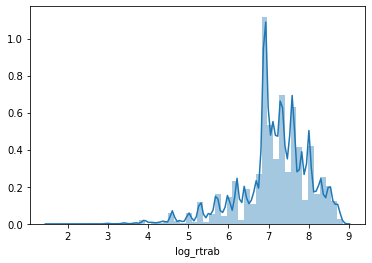

In [61]:
sns.distplot(df_ocup["log_rtrab"]);

Para aprofundar a análise, vamos plotar a distribuição de renda do trabalho por grupos de homens e mulheres.

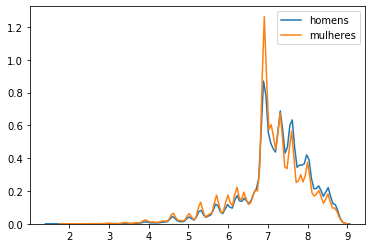

In [62]:
df_h = df_ocup[df_ocup.sexo == "homem"]
df_m = df_ocup[df_ocup.sexo == "mulher"]

sns.distplot(df_h[["log_rtrab"]], hist=False, label = "homens" )
sns.distplot(df_m[["log_rtrab"]], hist=False, label = "mulheres");

Em um gráfico de dispersão podemos verificar uma evidência da relação entre anos de estudo e renda do trabalho para os dois grupos.

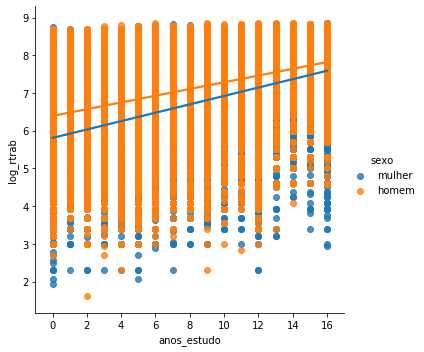

In [63]:
sns.lmplot('anos_estudo', 'log_rtrab', hue='sexo', data=df_ocup);

### Regressão linear

Apesar de não ser o foco do presente Notebook, vamos apresentar de forma breve as estimações de modelos de regressão linear.

Aqui os modelos serão estimados pelo método de Mínimos Quadrados Ordinários (OLS - *Ordinary Least Square*).

Para essas estimações vamos usar a biblioteca **statsmodel** (https://www.statsmodels.org/).

In [64]:
# Primeiro vamos importar o statsmodel e a API formula
import statsmodels.api as sm
import statsmodels.formula.api as smf

Vamos estimar uma regressão do log da renda do trabalho em função da escolaridade (em anos de estudo).

In [65]:
# define o modelo
model1 = smf.ols(formula = 'log_rtrab ~ anos_estudo', data = df_ocup)
# estima
model1 = model1.fit()
# imprime os resultados
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_rtrab   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                 4.454e+04
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:28:05   Log-Likelihood:            -2.0652e+05
No. Observations:              177320   AIC:                         4.131e+05
Df Residuals:                  177318   BIC:                         4.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.2527      0.005   1349.175      

Para estimar um modelo de regressão linear múltipla vamos adicionar mais algumas variáveis explicativas: idade e sexo.

In [66]:
model2 = smf.ols(formula = 'log_rtrab ~ anos_estudo + idade + sexo', data = df_ocup)
model2  = model2.fit() 
print(model2 .summary())

                            OLS Regression Results                            
Dep. Variable:              log_rtrab   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                 1.969e+04
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:28:06   Log-Likelihood:            -2.0090e+05
No. Observations:              177320   AIC:                         4.018e+05
Df Residuals:                  177316   BIC:                         4.019e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.8896      0.009    621.

Em uma primeira checagem dos resultados, podemos verificar que os coeficientes foram estimados com os sinais esperados e são estatisticamente significantes. Mas não devemos nos atentar apenas a avaliar isto. Em outro Notebook podemos abordar de forma detalhada a análise dos resultados de modelo de regressão linear simples, bem como o diagnóstico do modelo.